<a href="https://colab.research.google.com/github/cpython-projects/E1402/blob/main/session_05_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

**Data Visualization** is the transformation of numbers into charts. It helps to:

* See trends, relationships, and anomalies;
* Better explain data to a client or colleague;
* Communicate analytics to a non-technical audience;
* Detect errors in the data;
* Prepare reports or presentations.

> **A bad chart is worse than no chart at all.**

## What to Pay Attention To

1. **Scale**: is the variable quantitative, ordinal, or categorical?
2. **Choice of chart type**: scatter, bar, box, histogram — each serves a different purpose.
3. **Aggregation**: barplot by mean ≠ median.
4. **Missing values and outliers**: not all charts “forgive” `NaN`.
5. **Scale manipulation**: an incorrect Y-axis scale can distort conclusions.
6. **Color, shape, size**: visual attention is drawn to bright elements — this affects interpretation.

## Basic Principles of Quality Visualization:

| Principle              | Explanation                                                               |
| ---------------------- | ------------------------------------------------------------------------- |
| 1. 📐 Proper scale     | Do not change scales in a way that distorts the data.                     |
| 2. 🎯 Simplicity       | One chart — one idea. Avoid overloading with details.                     |
| 3. 🧩 Explanation      | Axis labels, legends, and titles are essential.                           |
| 4. 🎨 Meaningful color | Use color only if it conveys information.                                 |
| 5. ⚠️ Context          | Without axes and measurement units, it’s not a chart — it’s manipulation. |


## How Charts Can Be Misleading?

**Example 1: Truncated Y-Axis**

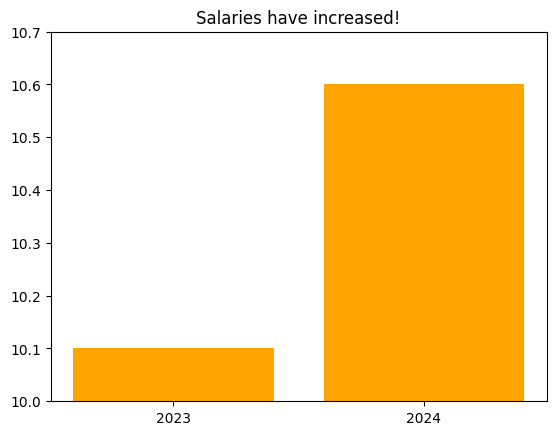

In [2]:
import matplotlib.pyplot as plt

plt.bar(['2023', '2024'], [10.1, 10.6], color='orange')
plt.ylim(10, 10.7)
plt.title("Salaries have increased!")
plt.show()

> It looks like salaries have doubled, even though the actual increase is only 5%.

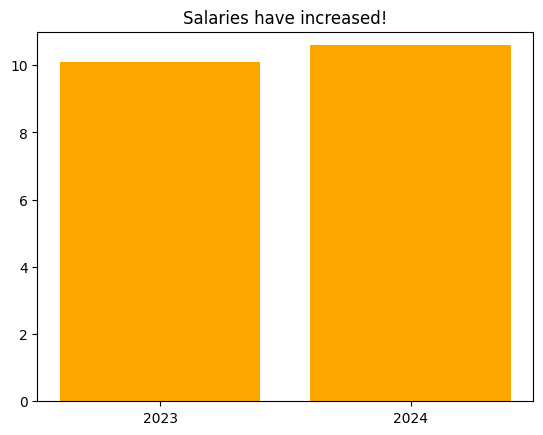

In [3]:
plt.bar(['2023', '2024'], [10.1, 10.6], color='orange')
plt.ylim(0, 11)
plt.title("Salaries have increased!")
plt.show()

**Example 2: Changing the X/Y Scale**

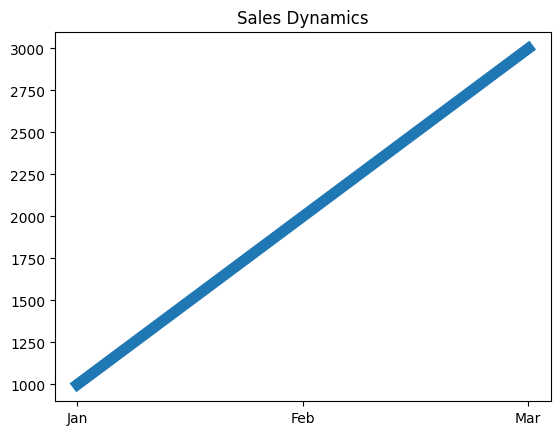

In [4]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [1000, 2000, 3000], label="Sales", linewidth=8)
plt.xticks([1, 2, 3], ['Jan', 'Feb', 'Mar'])
plt.title("Sales Dynamics")
plt.show()

> The line looks steep because visual cues emphasize change, even when the growth is actually linear.

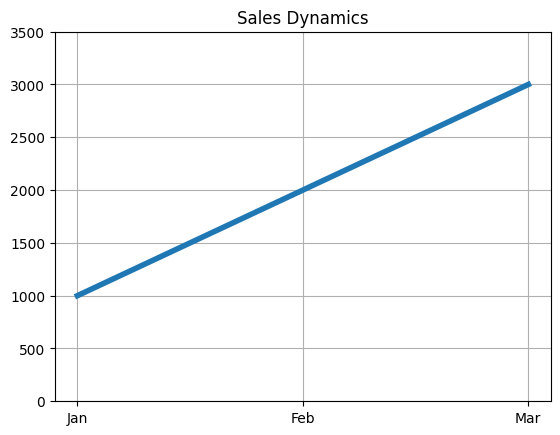

In [5]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [1000, 2000, 3000], label="Sales", linewidth=4)
plt.xticks([1, 2, 3], ['Jan', 'Feb', 'Mar'])
plt.ylim(0, 3500)
plt.title("Sales Dynamics")
plt.grid(True)
plt.show()

## Libraries

**Seaborn**

* Built on top of Matplotlib.
* Simple syntax for statistical plots.
* Well-suited for exploratory data analysis (EDA).

**Plotly**

* Interactive charts.
* Ideal for presentations and dashboards.
* Allows hovering, zooming, and clicking.


In [6]:
!pip install seaborn

## Histogram

In [7]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/da_1305/refs/heads/main/real_estate_data.csv')
df.head()

,Unnamed: 0,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,days_exposition
0,0,7312500.0,108.0,2024-05-15,3,2.70,16.0,51.0,8,NaN,False,25.0,NaN,Kyiv,NaN
1,1,1884375.0,40.4,2024-08-14,1,NaN,11.0,18.6,1,NaN,False,11.0,2.0,Brovary,81.0
2,2,2922750.0,56.0,2023-11-06,2,NaN,5.0,34.3,4,NaN,False,8.3,0.0,Kyiv,558.0
3,3,36506250.0,159.0,2024-03-19,3,NaN,14.0,NaN,9,NaN,False,NaN,0.0,Kyiv,424.0
4,4,5625000.0,100.0,2024-06-12,2,3.03,14.0,32.0,13,NaN,False,41.0,NaN,Kyiv,121.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import plotly.express as px

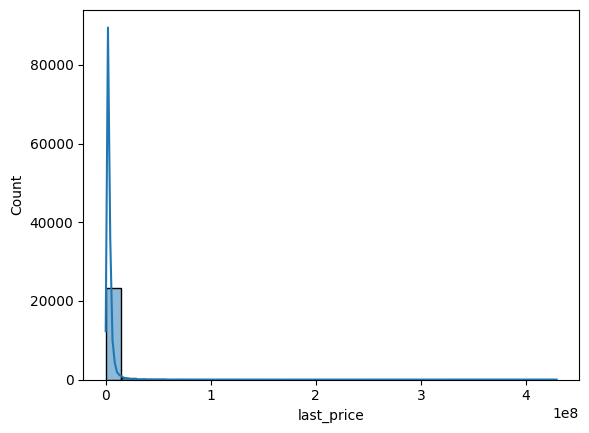

In [10]:
sns.histplot(df['last_price'], bins=30, kde=True)
plt.show()

In [11]:
px.histogram(df, x='last_price', nbins=30)

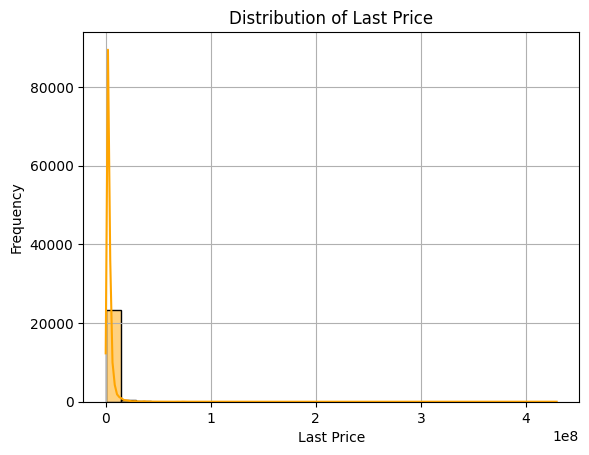

In [12]:
sns.histplot(
    df['last_price'],
    bins=30,
    kde=True,
    color='orange',
    edgecolor='black',
    linewidth=1
    )
plt.xlabel('Last Price')
plt.ylabel('Frequency')
plt.title('Distribution of Last Price')
plt.grid(True)
plt.show()

## Boxplot (Box-and-Whisker Plot)

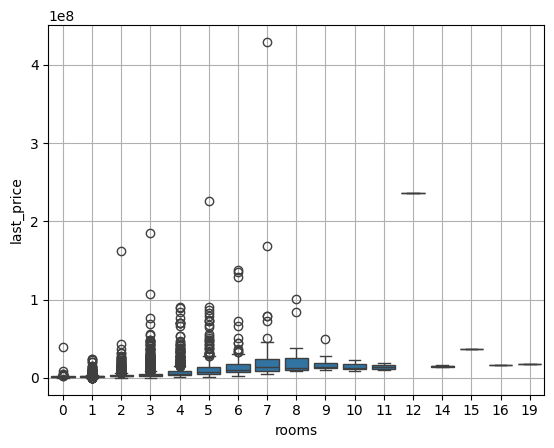

In [13]:
sns.boxplot(data=df, x='rooms', y='last_price')
plt.grid(True)
plt.show()

In [14]:
px.box(df, x='rooms', y='last_price')

In [15]:
fig = px.box(df, y="last_price")
fig.show()

## Scatterplot

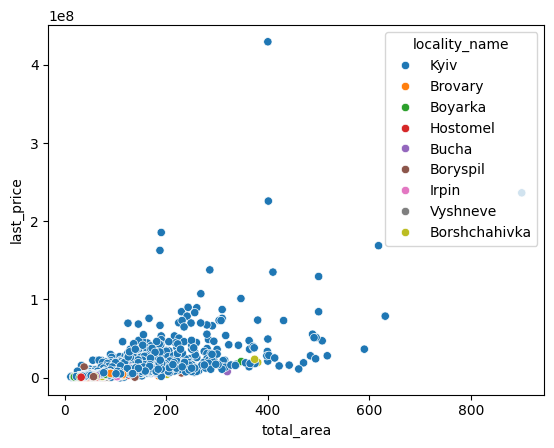

In [16]:
sns.scatterplot(df, x='total_area', y='last_price', hue='locality_name')
plt.show()

In [17]:
px.scatter(df, x='total_area', y='last_price', color='locality_name')

## Barplot (Column Chart with Aggregation)

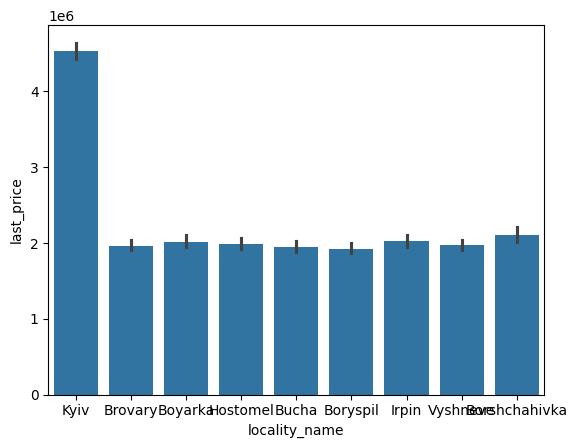

In [18]:
sns.barplot(df, x='locality_name', y='last_price')
plt.show()

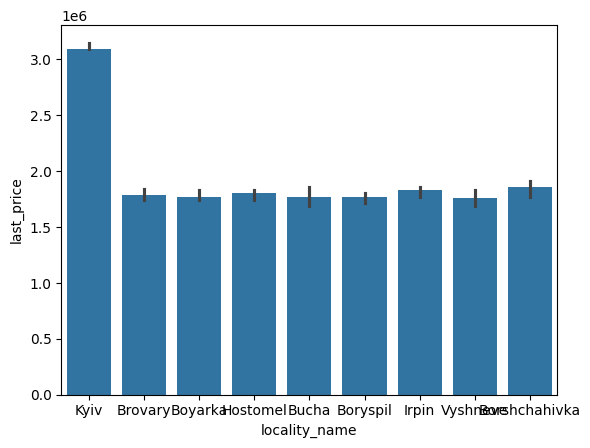

In [19]:
sns.barplot(df, x='locality_name', y='last_price', estimator='median')
plt.show()

In [20]:
df_group = df.groupby('locality_name')['last_price'].median().reset_index()
px.bar(df_group, x='locality_name', y='last_price')

## Lineplot

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])


In [22]:
df['month'] = df.first_day_exposition.dt.to_period('M').dt.to_timestamp()

In [23]:
df

,Unnamed: 0,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,days_exposition,month
0,0,7312500.0,108.00,2024-05-15,3,2.70,16.0,51.0,8,NaN,False,25.00,NaN,Kyiv,NaN,2024-05-01
1,1,1884375.0,40.40,2024-08-14,1,NaN,11.0,18.6,1,NaN,False,11.00,2.0,Brovary,81.0,2024-08-01
2,2,2922750.0,56.00,2023-11-06,2,NaN,5.0,34.3,4,NaN,False,8.30,0.0,Kyiv,558.0,2023-11-01
3,3,36506250.0,159.00,2024-03-19,3,NaN,14.0,NaN,9,NaN,False,NaN,0.0,Kyiv,424.0,2024-03-01
4,4,5625000.0,100.00,2024-06-12,2,3.03,14.0,32.0,13,NaN,False,41.00,NaN,Kyiv,121.0,2024-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,23694,5456250.0,133.81,2024-06-23,3,3.70,5.0,73.3,3,NaN,False,13.83,NaN,Kyiv,NaN,2024-06-01
23695,23695,1743750.0,59.00,2023-11-22,3,NaN,5.0,38.0,4,NaN,False,8.50,NaN,Borshchahivka,45.0,2023-11-01
23696,23696,1406250.0,56.70,2024-07-22,2,NaN,3.0,29.7,1,NaN,False,NaN,NaN,Boryspil,NaN,2024-07-01
23697,23697,6454688.0,76.75,2023-09-23,2,3.00,17.0,NaN,12,NaN,False,23.30,2.0,Kyiv,602.0,2023-09-01


In [24]:
res = df.groupby('month')['last_price'].mean().reset_index()

In [25]:
res.columns.to_list()

['month', 'last_price']

In [26]:
px.line(res, x='month', y='last_price')